<a href="https://colab.research.google.com/github/SungjooHwang/ICTclass/blob/main/Ex02_2_Simple_Regression_Multiple_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the data (same structure: X1, X2, y)
data = pd.read_csv('Ex02_2_Data.csv', header=None)
X = data.iloc[:, 0:2].values  # X1: size (sq-ft), X2: number of bedrooms
y = data.iloc[:, 2].values    # y: price
m = len(y)                    # Number of training examples

In [8]:
# Feature normalization
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_norm = (X - mu) / sigma

# Add intercept term (bias)
X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [9]:
# Gradient Descent
print('Running Gradient Descent ...')

theta = np.zeros(3)   # 3 parameters: theta0, theta1, theta2
iterations = 400
alpha = 0.01
J_history = []

for i in range(iterations):
    h = X_norm @ theta
    error = h - y
    gradient = (1/m) * (X_norm.T @ error)
    theta -= alpha * gradient
    J = (1/(2*m)) * np.sum(error ** 2)
    J_history.append(J)
    print(f"Cost at iteration {i+1}: {J:.4f}")

Running Gradient Descent ...
Cost at iteration 1: 65591548106.4574
Cost at iteration 2: 64297776251.6201
Cost at iteration 3: 63031018305.5213
Cost at iteration 4: 61790694237.5325
Cost at iteration 5: 60576236901.9910
Cost at iteration 6: 59387091739.9886
Cost at iteration 7: 58222716488.3894
Cost at iteration 8: 57082580895.8954
Cost at iteration 9: 55966166445.9788
Cost at iteration 10: 54872966086.5078
Cost at iteration 11: 53802483965.8951
Cost at iteration 12: 52754235175.6054
Cost at iteration 13: 51727745498.8599
Cost at iteration 14: 50722551165.3810
Cost at iteration 15: 49738198612.0259
Cost at iteration 16: 48774244249.1602
Cost at iteration 17: 47830254232.6268
Cost at iteration 18: 46905804241.1690
Cost at iteration 19: 46000479259.1725
Cost at iteration 20: 45113873364.5914
Cost at iteration 21: 44245589521.9284
Cost at iteration 22: 43395239380.1443
Cost at iteration 23: 42562443075.3712
Cost at iteration 24: 41746829038.3124
Cost at iteration 25: 40948033806.2095
Cost 

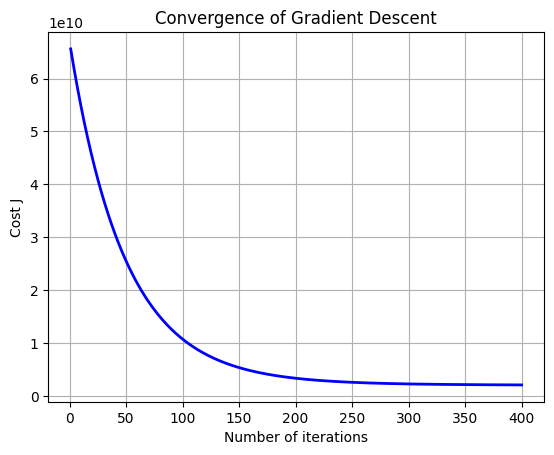

In [10]:
# Plotting Cost
plt.plot(range(1, iterations+1), J_history, '-b', linewidth=2)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.title("Convergence of Gradient Descent")
plt.grid(True)
plt.show()

In [11]:
# Prediction
input_features = np.array([1650, 3])
input_norm = (input_features - mu) / sigma
input_vec = np.concatenate([[1], input_norm])  # Add intercept
predicted_price = input_vec @ theta

print(f"Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${predicted_price:.2f}")

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289221.55
